### Importing the Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pickle
import joblib
import os

### Load Preprocessed Data

In [3]:
X_train = pd.read_csv("..\\Dataset\\X_train.csv")
X_test = pd.read_csv("..\\Dataset\\X_test.csv")
y_train = pd.read_csv("..\\Dataset\\y_train.csv")
y_test = pd.read_csv("..\\Dataset\\y_test.csv")

# Flatten y_train and y_test if needed (in case they're DataFrames with a single column)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [5]:
if 'INCOME_BIN' in X_train.columns:
    le = LabelEncoder()
    combined = pd.concat([X_train['INCOME_BIN'], X_test['INCOME_BIN']], axis=0)
    le.fit(combined)

    X_train['INCOME_BIN'] = le.transform(X_train['INCOME_BIN'])
    X_test['INCOME_BIN'] = le.transform(X_test['INCOME_BIN'])


###  Train Multiple Models

In [6]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


### Evaluate the Models

In [8]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Decision Tree", y_test, dt_preds)



Model: Logistic Regression
Accuracy : 0.9986
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000

Model: Random Forest
Accuracy : 0.9984
Precision: 0.2927
Recall   : 0.0976
F1 Score : 0.1463

Model: XGBoost
Accuracy : 0.9985
Precision: 0.2143
Recall   : 0.0244
F1 Score : 0.0438

Model: Decision Tree
Accuracy : 0.9982
Precision: 0.1800
Recall   : 0.0732
F1 Score : 0.1040


### Save the Best Model

In [13]:
output_folder = '../Saved_Models'
os.makedirs(output_folder, exist_ok=True) 

model_path = os.path.join(output_folder, 'random_forest_model.pkl')

# Save the model
joblib.dump(rf_model, model_path)

print(f"Best model saved at: {model_path}")


Best model saved at: ../Saved_Models\random_forest_model.pkl


### 

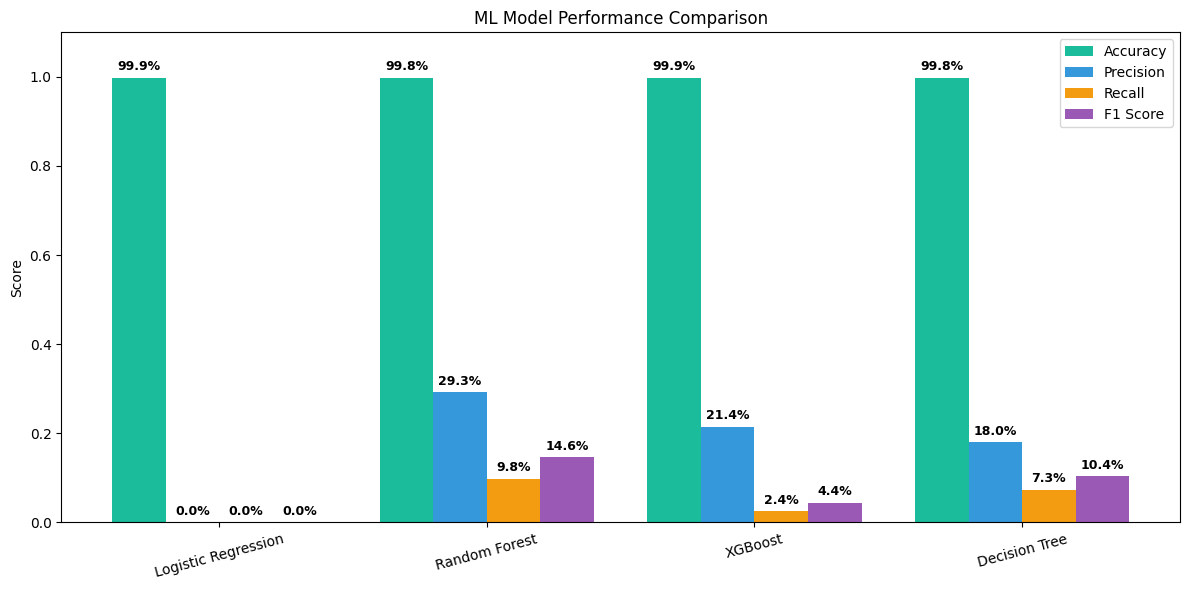

Graph saved successfully in '../Images\model_performance_comparison.png'


In [ ]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Decision Tree": dt_model
}

# Collect metrics
metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))

# Create DataFrame
df_metrics = pd.DataFrame(metrics, index=models.keys())

# Plot settings
x = np.arange(len(df_metrics.index))  
width = 0.2  
colors = ['#1abc9c', '#3498db', '#f39c12', '#9b59b6']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(df_metrics.columns):
    bars = plt.bar(x + i * width - 1.5 * width, df_metrics[metric], width, label=metric, color=colors[i])
    
    # Add percentage labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height*100:.1f}%', 
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(x, df_metrics.index, rotation=15)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('ML Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

output_folder = '../Images'  
os.makedirs(output_folder, exist_ok=True)

filename = os.path.join(output_folder, 'model_performance_comparison.png')
plt.savefig(filename)
plt.close()

print(f"Graph saved successfully in '{filename}'")
